### 의사결정나무(Decision Tree)

1. 의사결정나무모형
  - 의사결정나무는 데이터를 분석하여 이들 사이에 존자하는 패턴을 예측 가능한 규칙들의 조합으로 나타내며 그모 양이 `나무`와 같다해서 `의사결정나무`라고 불린다. 질문을 던져서 대상을 좁혀나가는 방식의 `스무고개`놀이와 유사한 개념이다.
- 의사결정나무는 `분류(Classification)`와 `회귀(Regression` 모두 가능하다. 즉 범주나 연속형 수치 모두 예측할 수 있다는 의미이다.

2. 의사결정나무의 2가지 기본아이디어

 - 반복적 분할(Recursive Patitining)
  * 데이터를 두 부분으로 반복해서 잘라 세분화된 영역내에서의 동질성이 최대가 되도록 함
  * 계속 잘라나가다 보면 보는 학습용 데이터를 100% 정확하게 분류해낼 수 있을 만큼 세분화할 수 있다. 
  * 너무 자세하게 분류해서 시간이 많이 걸리거나 과적합화 즉, 과거지라뇨는 잘 맞추지만 미래(예측) 데이터는 못맞추는 경우가 발생하게 된다. 따라서 불필요한 자료들을 가지치기가 필요하게 된다.
  
- 분류나무의 가지치기(Pruning the tree)
 * 상기에서 설명한 반복적 분할을 반복하다 보면 과적합화는 피할 수 없이 나타나게 된다.
 * 과적합화를 피하기 위해서는 불필요한 가지(정보 제공이 그리 많지 않은 가지)를 제거함으로서 나무를 단순화하는 작업이 이루어지게 된다.
   
3. 반복적 분할의 예

 - 수입과 주택크기의 상관관계
 
  * 첫 번째 분할 : 주택 크기가 19,000
  * 두 번째 분할 : 수입이 84,000
  * 계속해서 반복적인 분할을 tree구조로 분할 
   
4. 단점 : 과적합화 문제 
 
 - 인공신경망에서의 다른 기계학습과 동일한 문제 발생(과적합화)
 - 과적합해소방법
  * 카이제곱(Chai, chi-squared automatic interaction detection) : 카이제곱검정을 이용해서 적당한 수준에서 나무의 분할(성장)을 중단 시키는 방법
  * CART : 일단 나무를 최대한으로 분할(성장)시킨 후에 가지치기를 수행해서 학습용 데이터로 나무를 분할(성정)시키고 검증용 데이터로 가지치기를 수행
  
5. 실습(붓꽃품종의 종류)
 

##### graphviz 설치
* 다운로드 : http://graphviz.gitlab.io/_pages/Download/Download_windows.html
* 설치 : pip install graphviz or conda install graphviz
* 패스설정 : sysdm.cpl
- C:\Program Files (x86)\Graphviz2.38\bin
- C:\Program Files (x86)\Graphviz2.38\bin\dot.exe

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False

In [18]:
!pip install graphviz

In [2]:
import mglearn
import graphviz

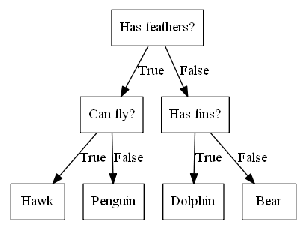

In [3]:
mglearn.plots.plot_animal_tree()

##### 결정 트리 만들기

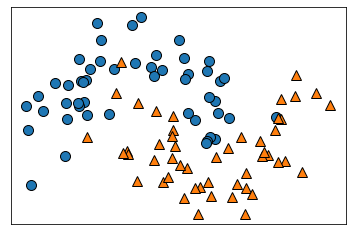

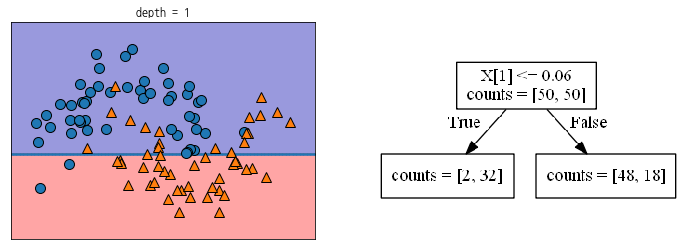

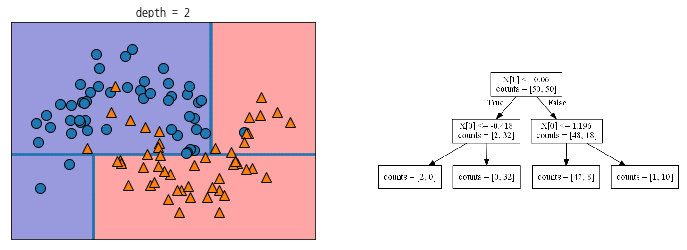

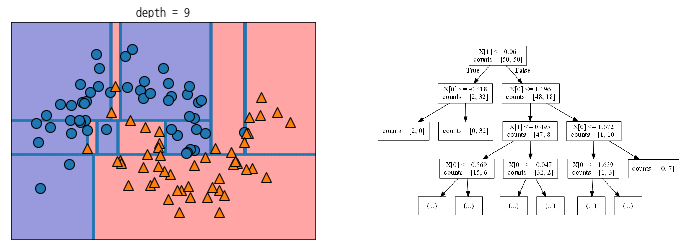

In [4]:
mglearn.plots.plot_tree_progressive()
# 루트노드인 첫번째는 x[1] =0.06에서 수평으로 분할된 것이 가장 많은 데이터를 분류
# 즉, 0.06에서 분류가 일어나 왼쪽 노드는 0=2개 , 1= 32개, 오른쪽 노드는 0=48개, 1=18개로 분류
# 왼쪽그래프는 수평선 아래를 의미, 오른쪽은 위를 표시한다.

In [ ]:
# 루트노드인 첫번째는 x[1] =0.0596

###### 결정트리의 복잡도 제어하기

일반적으로 트리로 훈련된 모델은 100% 정확하게 맞출 수 있는데 이 의미는 과대적합이 된다는 의미이다. 이 과대적합을 막는 두가지 방법은 트리생성을 일찍 중단하는 `사전가지치기 pre-pruning`와 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략 `사후 가지치기 post-pruning or 가지치기 prunint`이다

사전 가지치기 방법은 트리의 최대 깊이나 리프의 최대갯수를 제한하거나 또는 노드가 분할하기 위한 포인트의 최소갯수를 사전에 지정하는 것이다.

###### 실습 1 유방암예측 실습

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print("cancer.keys() : {}".format(cancer.keys()))

cancer.keys() : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
from sklearn.tree import DecisionTreeClassifier
# scikit-learn에서 결정트리는 DecisionTreeClassifier,DecisionTreeRegressor
# scikit-learn에서는 사전 가지치기만 지원한다.
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('훈련세트점수: {:.2f}'.format(tree.score(X_train, y_train)))
print('검증세트점수: {:.2f}'.format(tree.score(X_test, y_test)))

# 결과분석
# 예상한대로 훈련세트의 정확도는 100%이다. 즉 DT는 훈련데이터넷의 모든 레이블(정답)을
# 정확하게 예측할 만큼 충분히 깊게 만들어졌다.
# 결정트리의 깊이를 제한하지 않으면 무한정 깊어지고 복잡해 질 수 있다. 그래서 가지치기를
# 하지 않는 결정트리는 과대적합가 되기 쉽고 예측을 위한 데이터에는 잘 일반화 되지 않는다.

훈련세트점수: 1.00
시험세트점수: 0.94


In [15]:
# 사전 가지치기
tree = DecisionTreeClassifier(random_state=0,max_depth=5)
tree.fit(X_train,y_train)
print('훈련세트점수: {:.3f}'.format(tree.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(tree.score(X_test, y_test)))

훈련세트점수: 0.995
검증세트점수: 0.951


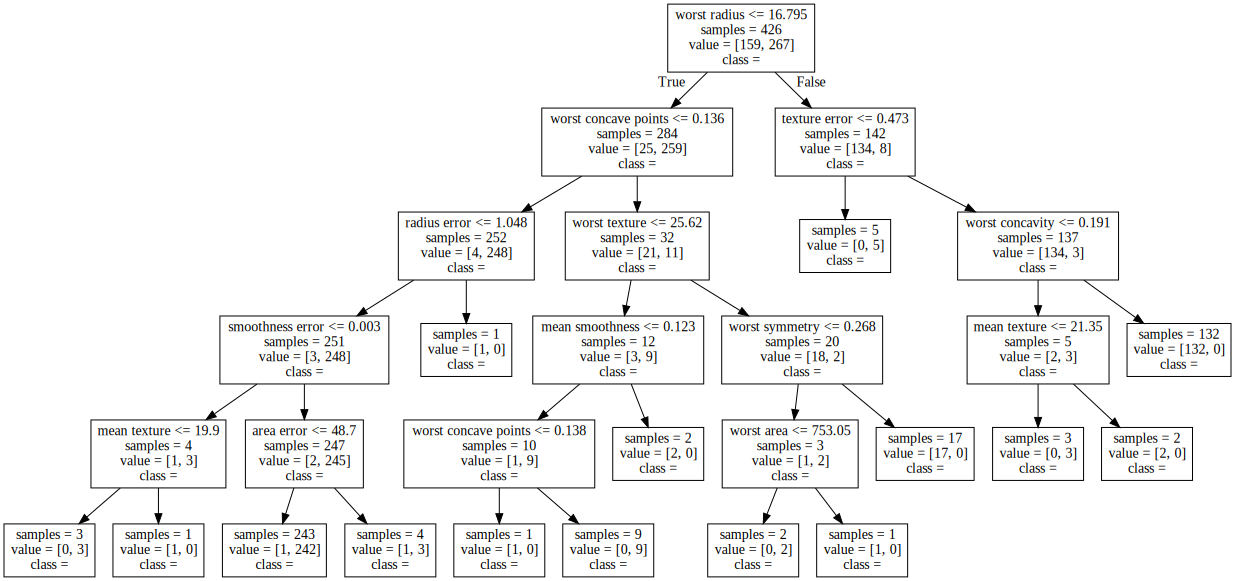

In [19]:
# 의사결정나무의 그래프 저장하기
# 트리모듈의 export_graphviz 함수를 이용한 시각화
# 이 함수는 그래프 저장용 텍스트파일 포멧인 .dot파일을 생성한다.
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="../data/ml/tree.dot", class_names=["악성","양성"],
               feature_names=cancer.feature_names, impurity=False, filled=False)
with open("../data/ml/tree.dot",encoding="utf-8") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

# 결과분석
# 깊이가 4만 되어도 매우 복잡해진다. 트리가 더 깊어지면(10정도의 깊이는 보통) 한눈에 
# 알아볼수가 없다.

###### 트리의 특성 중요도

전체트리가 보는 것이 어려울 수 있기 때문에 대신 트리가 어떻게 동작하는지 요약하는 속성들을 사용할 수가 있는데 가장 널리 사용되는 속성은 트리를 만드든 결정에 각각의 특성들이 얼마나 중요한지를 평가하는 `특성중요도 feature importance`이다.

이 값은 0과 1사이 값으로 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 `1`은 완벽하게 타겟 클래스(즉, 정답, label)를 예측했다는 의미이다. 특성 중요도의 전체합은 항상 1이다.

In [30]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.01991644 0.         0.         0.01378831 0.
 0.         0.         0.         0.         0.0099313  0.04713547
 0.         0.00243002 0.00235257 0.         0.         0.
 0.         0.         0.70786451 0.03236422 0.         0.00680904
 0.         0.         0.01771345 0.1281193  0.01157537 0.        ]


In [32]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

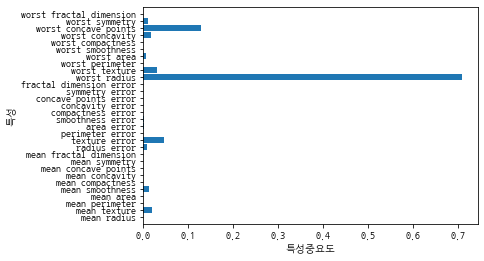

In [36]:
# 특성중요도 시각화
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
#     print(n_features)
    plt.barh(range(n_features),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    plt.show()
    
                         
plot_feature_importances_cancer(tree)

# 결과 분석
# 첫 번째 노드에서 사용한 특성 worst radius 가 가장 중요한 특성으로 나타난다.
# 어떤 특ㄷ성의 값이 낫다고 해서 해당 특성이 유용하지 않다는 뜻은 아니다. 단지
# 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있지 
# 않을 수도 있다.

###### 특성과  클래스(정답)사이의 관계 살펴보기

Feature importances: [0. 1.]


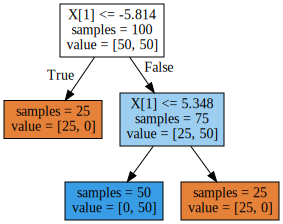

graphviz.files.Source

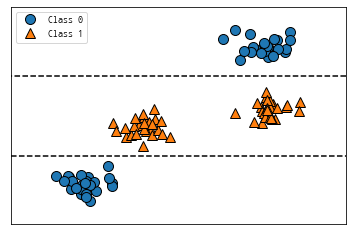

In [40]:
# y축의 특성이 클래스 레이블과 복합적인 관계를 가지고 있는 2차원 데이터셋과 
# 결정트리가 만든 결정경계
tree =mglearn.plots.plot_tree_not_monotone()
display(tree)

# 결과분석
# X[1]에 있는 자료, 즉 특성 = 1만 사용되었고 0은 전혀 사용되지 않았지만 그래프의 결정경계에서
# 볼수 있듯이 특성 1의 값이 높으면 클래스 0 또는 1이라 말할 수가 없다.

###### 실습2: 붓꽃품종분류

In [42]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler # 단위가 틀린놈들을 정규화 작업을 해준다.

In [46]:
# iris = load_iris()
# print(iris)
print(iris.keys())
# print(iris.values())


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [47]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [53]:
# 예측하려는 품종명
print("타깃 이름: {}".format(iris['target_names']))
# 붓꽃의 특성
print("특성 이름: {}".format(iris.feature_names))
# 데이터의 크기
print("자료 크기 :{}".format(iris.data.shape))
print("자료의 첫 5행 : {}".format(iris.data[:5]))

타깃 이름: ['setosa' 'versicolor' 'virginica']
특성 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
자료 크기 :(150, 4)
자료의 첫 5행 : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [111]:
# 모든 행의 2,3열만 선택
X=iris.data[:,[2,3]] # 꽃잎의 길이와 넓이
y=iris.target # 붓꽃의 품종
print(X[0:5])
print(y[0:5])

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# 데이터 표준화 작업(붓꽃의 넓이, 길이값을 0.0~1.0사이 값으로 표준화)
# 전처리 기능 -> 스케일링
# 스케일링은 자료 집합에 적용되는 전처리과정으로 모든 자료에 선형변환을 적용하며
# 전체 자료의 분포를 평균 0, 분산1 이 되도록 만드는 과정이다.
# 스케일링은 자료의 오버플로우(Overflow), 언더플로우(Underflow)를 방지하고
# 독립변수의 공분산 행렬의 조건수(condition number)를 감소시켜서 최적화 과정에서의
# 안정성 및 수렴 속도를 향상시킨다.

sc = StandardScaler()
sc.fit(X_train)

# 표준화 데이터셋 생성
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std[:5])
print(X_test_std[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0]
[[-0.18295039 -0.29318114]
 [ 0.93066067  0.7372463 ]
 [ 1.04202177  1.63887031]
 [ 0.6522579   0.35083601]
 [ 1.09770233  0.7372463 ]]
[[ 0.70793846  1.51006688]
 [ 0.09545238 -0.29318114]
 [-1.35224199 -1.32360858]
 [ 1.37610509  0.7372463 ]
 [-1.29656144 -1.32360858]]


In [76]:
from sklearn.tree import DecisionTreeClassifier
# 트리모델 생성
# https://ratsgo.github.io/machine%20learning/2017/03/26/tree/
# criterion : 사용할 알고리즘을 정의 gini 또는 entropy
# max_depth=3
iris_tree= DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)
iris_tree.fit(X_train, y_train)
print('훈련세트점수: {:.3f}'.format(iris_tree.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(iris_tree.score(X_test, y_test)))

훈련세트점수: 0.981
검증세트점수: 0.978


In [69]:
iris_tree.fit(X_train_std, y_train)
print('훈련세트점수: {:.3f}'.format(iris_tree.score(X_train_std, y_train)))
print('검증세트점수: {:.3f}'.format(iris_tree.score(X_test_std, y_test)))

훈련세트점수: 0.981
검증세트점수: 0.978


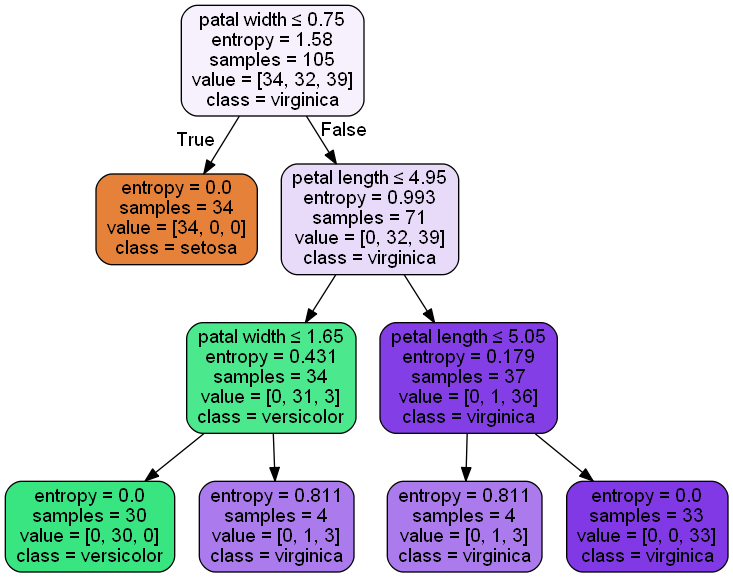

In [81]:
# 붓꽃 예측결과 시각화
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
# conda install pydotplus
import pydotplus
dot_data = export_graphviz(iris_tree,out_file=None,
                          feature_names=["petal length",'patal width'],
                          class_names=iris.target_names,filled=True, rounded="True",
                          special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [83]:
from IPython.display import YouTubeVideo
# YouTubeVideo('inN8seMm7UI')
# http://youtube/inN8seMm7UI

#### 결정트리의 앙상블

`앙상블 Ensemble`의 여러 머신러닝모델을 연결하여 좀 더 강력한 모델을 만드는 기법이다. 머신러닝에는 분류와 회귀문제의 다양한 데이터셋에서 효과적이라고 입증되었다.

`랜덤포레스트 RandomForest`와 `그래디언트 부스팅 gradient bossting` 결정트리는 둘다 모델을 구성하는 기본 요소로 결정트리를 사용한다.


###### 1. 랜덤포레스트(Randomforest)

의사결정나무의 단점은 과거데이터는 잘 맞추지만 새로운 데이터에 예측력이 약하다. 이를 과적합화라고 하는데 과적합화를 방지할 수 있는 대표적인 방법중 하나가 `랜덤 포레스트 Random Forest`이다.

`Random Forest`트리를 많이 많들어 놓고 가장 성과가 좋은 것을 선택한다. 트리가 많이 만들어 진다 하더라도 속도가 그렇게 느리지니는 않다.

여러개의 의사결정 나무를 만들고 투표를 통해서 다수결로 결과를 결정한다. `Random Forest`는 처리가 바르고 분류 정밀도가 높다.

랜덤포레스트는 기본적으로 조금씩 다른 여러개의 결정트리의 묶음이다. 랜덤포레스트를 만들려면 생성할 트리의 갯수를 정해야 한다. 
(RandomForestRegressor 이나 RandomForestClassifier의 n_stimators 매개변수)알고리즘은 각 트리가 고유하게 만들어지도록 무작위 선택을 하는데 트리를 만들기 위해서 먼저 데이터의 `부트스트랩 샘플 bootstrap sample`을 생성한다. 
다시말해 n_samples 횟수 만큼 추출한다.(한 샘플이 여러번 중복추출 될 수 있다.)선택된 후보들 중에서 최선의 테스트를 찾고 몇개의 특성을 고를지는 max_features매개변수로 조정한다.

In [118]:
# make_moons를 가지고 트리 5개로 구성된 랜덤포레스트 모델을 생성
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,random_state=42) 
# random_state에 42를 넣는 이유는 큰 이유는 없다.

forest = RandomForestClassifier(n_estimators=5,random_state=2).fit(X_train,y_train)
print('훈련세트점수: {:.3f}'.format(forest.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(forest.score(X_test, y_test)))

훈련세트점수: 0.960
검증세트점수: 0.920


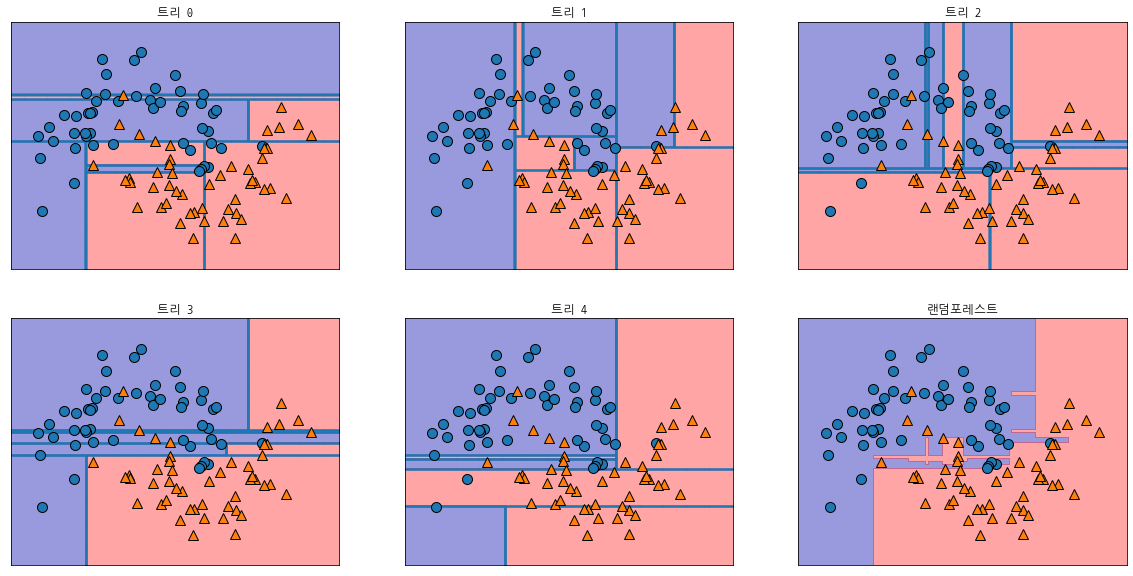

In [133]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)
# 5개 까지 그림 을 그림
mglearn.plots.plot_2d_separator(forest,X,fill=True, ax=axes[-1,-1],alpha=.4)
# 2D로 나누어진 것을 그림 
axes[-1,-1].set_title("랜덤포레스트")
# 타이틀 만들기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
# 점을 찍음 

# 결과분석
# 다섯개의 트리가 만든 결정경계는 환연하게 다르다. 부트스트랩 샘플링 때문에 한쪽 트리에
# 나타나는 훈련포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리는 블완전하다.
# 랜덤 포레스트 개개의 트리보다는 덜 과대접합되고 훨씬 좋은 결정경계를 만들어 준다. 실제
# 애플리케이션에서는 매우 많은 트리를 사용하기 때문에 더 부드러운 결정경계가 만들어 진다.

###### 장단점과 매개변수

회귀와 분류에 있어서 랜덤포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다. 랜덤포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요가 없다. 대량의 데이터셋에서 랜덤 포레스트 모델을 만들면 다소 시간이 걸릴 수 있지만 CPU코어가 많다면 손쉽게 병렬처리를 할 수 있다.

멀티프로세서일 때는 n_jobs 매개변수를 이용하여 사용할 CPU코어수를 지정 할 수 있다. 하지만 n_jobs 매개변수를 코어갯수보다 크게 지정하는 것은 별로 도움이 되지 않는다. n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다.

유의할 점은 랜덤포레스트는 말 그대로 랜덤하다.random_state를 지정하여 동일 결과가 나오도록 고정해야 한다.

###### 중요한 매개변수

>* n_estimators : 트리의 갯수, 이값은 클수록 좋다. 더 많은 트리를 평균하면 과대적합을 줄여서 보다 안정적인 모델을 만든다.

* max_features : 각 트리가 얼마나 무작위하게 될 지를 결정하면 값이 작으면 작을 수록 과대적합을 줄여준다. 일반적으로 기본값을 쓰는 것이 좋다. 
 - 분류는 max_features = sqrt(n_features)
 - 회귀는 max_features=n_features
 
* max_depth : 가지치기 횟수

###### 실습 3 . 독버섯(랜덤포래스트)

* 버섯데이터 : 독버섯여부, 첫번째컬럼 : 독버섯여부(독이 있으면 p, 독이 없으면 e)
* 자료의 특성 : https://archive.ics.uci.edu/ml/datasets/mushroom
* 머쉬롬 데이터 : https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/mushrooms.csv  

<img src="./images/28.머신러닝_지도학습_2_descision_tree_01.png" width=300 height=300/>

In [135]:
mr = pd.read_csv('../data/ml/mushroom/mushroom.csv')
mr.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [141]:
# 데이터 내부의 기호를 숫치로 변환
label=[]
data=[]
attr_list=[]
for row_index, row in mr.iterrows():
    label.append(row.iloc[0])# 독버섯여부 (p=poison, e=eatable)
    row_data=[]
    for v in row.iloc[1:]:
        # 문자를 수치로 변환
        row_data.append(ord(v))
    data.append(row_data)

print(label[:5])
print(data[0:5])

['e', 'e', 'p', 'e', 'e']
[[120, 115, 121, 116, 97, 102, 99, 98, 107, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 110, 110, 103], [98, 115, 119, 116, 108, 102, 99, 98, 110, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 110, 110, 109], [120, 121, 119, 116, 112, 102, 99, 110, 110, 101, 101, 115, 115, 119, 119, 112, 119, 111, 112, 107, 115, 117], [120, 115, 103, 102, 110, 102, 119, 98, 107, 116, 101, 115, 115, 119, 119, 112, 119, 111, 101, 110, 97, 103], [120, 121, 121, 116, 97, 102, 99, 98, 110, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 107, 110, 103]]


In [146]:
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(data,label)

# 기계학습
clf = RandomForestClassifier().fit(X_train,y_train)

# 데이터 예측
predict = clf.predict(X_test)
# 결과 출력
print('훈련세트점수: {:.3f}'.format(clf.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(clf.score(X_test, y_test)))

# 결과검증자료
from sklearn import metrics
ac_score = metrics.accuracy_score(y_test, predict)
cl_report = metrics.classification_report(y_test,predict)
print("정답률 : ",ac_score)
print("보고서",cl_report)

훈련세트점수: 1.000
검증세트점수: 1.000
정답률 :  1.0
보고서               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



##### 2. 그래디언트 부스팅(gradient bossting)

`그래디언트 부스팅 회귀 트리`는 여러개의 결정트리를 묶어 강력한 모델을 만드는 또는 앙상블 방법이다.
이름이 회귀이지만 회귀와 분류 모두에 사용할 수 있다. 랜덤포레스트와는 달리 이전 트리의 오차를 보완하는 방법으로 순차적으로 `순차적으로 트리를 만든다.`
기본적으로 그래디언트 부스팅회귀트리는 `무작위성이 없다.`대신에 강력한 `사전가지치기`가 사용된다.

이 방법은 보통 하나에서 다섯정도의 깊지 않은 트리를 사용함으로 메모리를 적게 사용하고 예측도 빠르다. 이 모델의 근본 아이디어는 이런 얕은 트리같은 모델(`약한 학습기 week learner`라고 한다.)을 많이 연결하는 것이다. 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어 트리가 많이 추가될 수록 성능이 좋아진다.

랜던포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 얻을 수 있다. 앙상블방식에 있는 사전가지치기나 트리개수제한등 이외에도 그래디언트 부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 `학습률 learning rate`이다. 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만든다. n_estimators값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련세트에서의 실수를 바로 잡을 기회가 더 많아진다.

In [149]:
# 유방암세트를 이용해 GradientBoostingClassFier를 사용
# 기본값 depth가 3인 트리 100개와 학습률 0.1로 설정
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=42)
gdrt= GradientBoostingClassifier(random_state=0).fit(X_train,y_train)
print('훈련세트점수: {:.3f}'.format(gdrt.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(gdrt.score(X_test, y_test)))

# 결과분석 

# 훈련세트가 정확도가 100%이므로 과대적합된 것 같아서 이를 방지하기 위해 트리의 최대 길이를 
# 줄여서 사전 가지치기를 강하게 하거나 학습률을 낮출 수가 있다.
# 이 두방식은 모델의 복잡도를 감소시켜 훈련세트의 정확도를 좀 낮출 수가 있다.(과적합방지)

훈련세트점수: 1.000
검증세트점수: 0.958


In [151]:
gdrt= GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train,y_train)
print('훈련세트점수: {:.3f}'.format(gdrt.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(gdrt.score(X_test, y_test)))

훈련세트점수: 0.988
검증세트점수: 0.958


In [153]:
gdrt= GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train,y_train)
print('훈련세트점수: {:.3f}'.format(gdrt.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(gdrt.score(X_test, y_test)))

훈련세트점수: 0.988
검증세트점수: 0.937


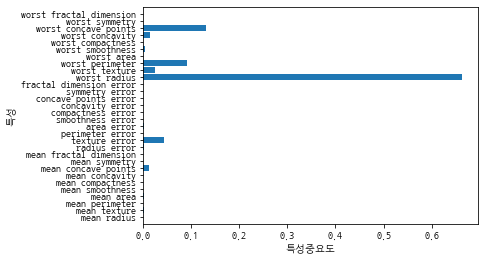

In [155]:
plot_feature_importances_cancer(gdrt)

###### 장단점과 매개변수

그래디언트 부스팅 결정트리는 지도학습에서 가장 강력하고 널리 사용하는 모델중 하나이지만 가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련시간이 길다는 것이다.

다른 트리기반 모델처럼 특성의 스케일을 조정하지 않아도 이전 특정이 연속적인 특성에서도 잘 동작한다. 그리고 트리기반 모델의 특성한 희소성 고차원 데이터에는 잘 작동되지 않는다.

###### 중요한 매개변수

>* n_estimators
* learning_rate : 이전 트리와의 차이를 보정하는 정도를 조절
* 상기 두 매개변수는 매우 깊게 연관되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서는 더 많은 트리를 추가해야 한다.
* n_estimators 가 클수록 좋은 랜덤포레스트와 달리 그래디언트 부스팅에서 이 값을 크개 하면 모델이 복잡해지고 과대적합될 가능성이 넢아진다.
* max_depth(or max_leaf_nodes)



In [90]:
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
# n_estimators 트리를 몇개 만들지 ?  criterion='gini 지니 알고리즘
forest.fit(X_train,y_train)
print('훈련세트점수: {:.3f}'.format(forest.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(forest.score(X_test, y_test)))

훈련세트점수: 1.000
검증세트점수: 0.958


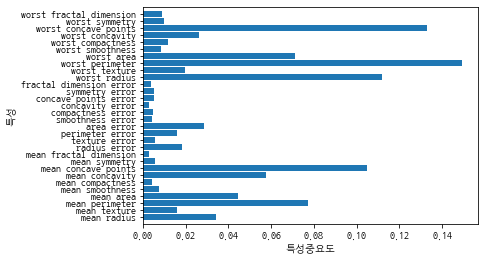

In [87]:
# 분석 결과를 시각화
plot_feature_importances_cancer(forest)

# 결과분석
# RandomForest는 아무런 매개변수의 튜닝이 없어도 선형모델 또는 단일 결정트리보다 높은
# 96%의 정확도를 내고 있다. 단일 결정트리처럼 max_features 값을 조정하거나 사전
# 가지치기가 가능하다.

###  연습문제
붓꽃자료로 RandomForest 실습, 다양한 옵션을 조정해보고 그 결과를 시각화하기

훈련세트점수: 1.000
검증세트점수: 0.947
훈련세트점수: 1.000
검증세트점수: 0.947


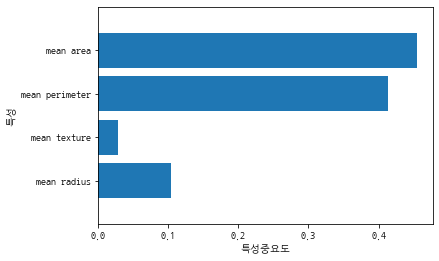

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris


iris =load_iris()
X_train, X_test, y_train,y_test = train_test_split(iris.data,iris.target,stratify=iris.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)
print('훈련세트점수: {:.3f}'.format(forest.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(forest.score(X_test, y_test)))
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)
# forest.fit(X_train_std,y_train)

# print('훈련세트점수: {:.3f}'.format(forest.score(X_train_std, y_train)))
# print('검증세트점수: {:.3f}'.format(forest.score(X_test_std, y_test)))
def plot_feature_importances_iris(model):
    n_features = iris.data.shape[1]
#     print(n_features)
    plt.barh(range(n_features),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    plt.show()

plot_feature_importances_iris(forest)


훈련세트점수: 1.00
검증세트점수: 0.94


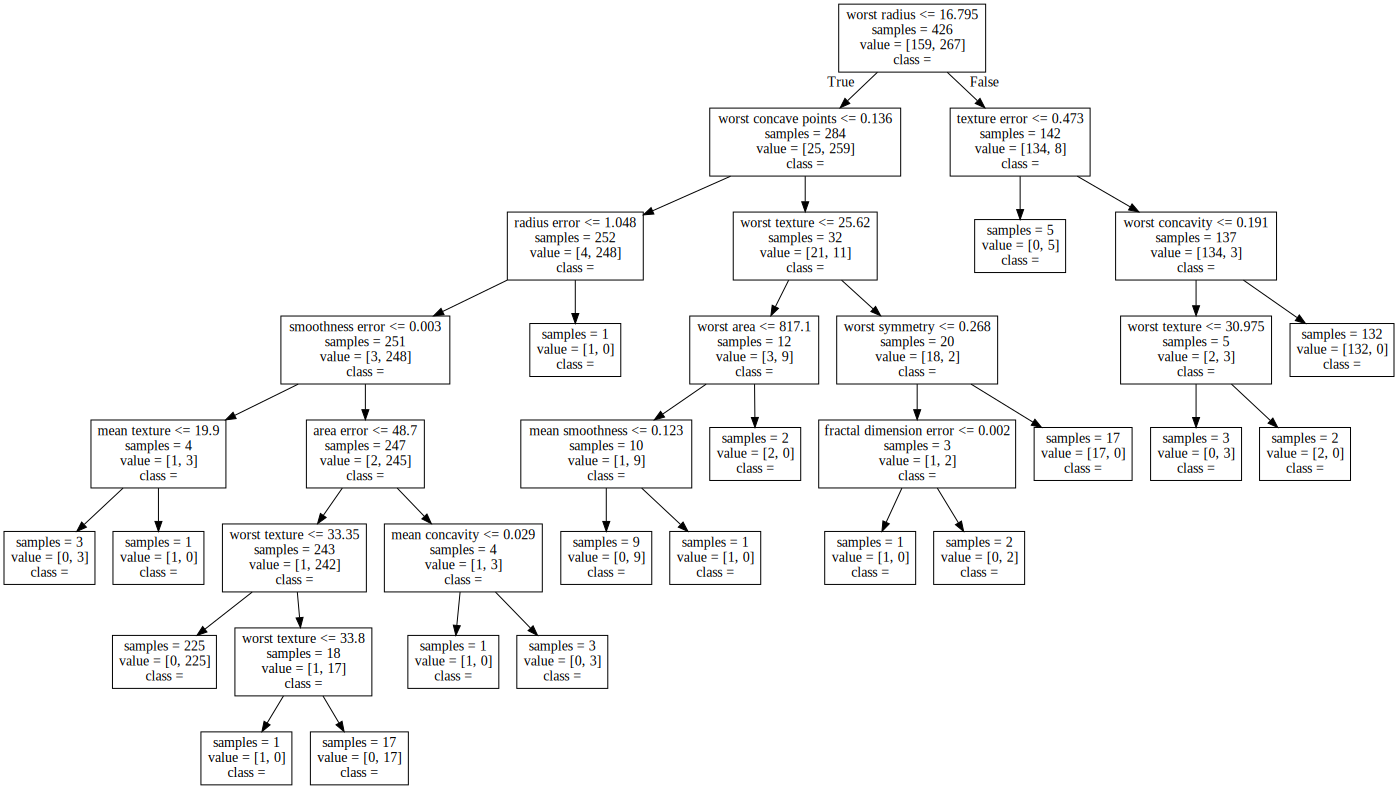

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('훈련세트점수: {:.2f}'.format(tree.score(X_train, y_train)))
print('검증세트점수: {:.2f}'.format(tree.score(X_test, y_test)))


from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="../data/ml/tree.dot", class_names=["악성","양성"],
               feature_names=cancer.feature_names, impurity=False, filled=False)
with open("../data/ml/tree.dot",encoding="utf-8") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))